# K-Means Clustering Code Demo

- **Objective**: Develop a K-Means clustering solution to separate/identify private or public universities.
- **Dataset**: College dataset
- **Reference**: Followed code along of Jose Portilla Python for Data Science and Machine Learning Bootcamp on Udemy (attaching link below)
https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5733548#content

**Factors**:
- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Reading in data 
df = pd.read_csv('Data/College_Data', index_col = 0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [29]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

Explore the relationship between **graduation rate and board room**.

/Applications/anaconda3/envs/deeplearning/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


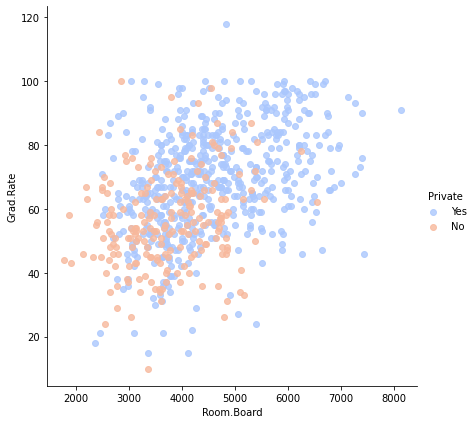

In [30]:
sns.lmplot(x='Room.Board', y='Grad.Rate',data=df, hue='Private',
          fit_reg = False, palette = 'coolwarm', size=6, aspect=1)

Explore the relationship between **number of undergraduates vs out of state tuition**.

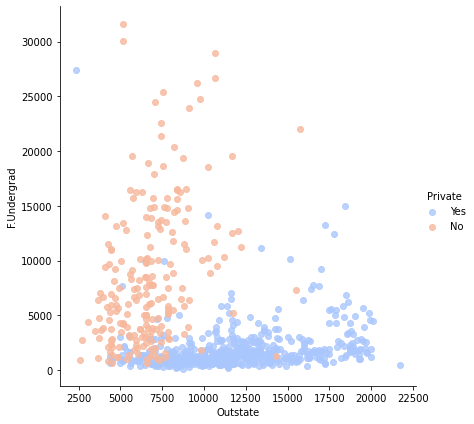

In [31]:
sns.lmplot(x='Outstate', y='F.Undergrad',data=df, hue='Private',
          fit_reg = False, palette = 'coolwarm', size=6, aspect=1)

## Model Creation

Creating a model with **2 clusters** and fitting the model on all data (no train-test-split)

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

Check **cluster center vectors**.

In [33]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation 

Hard to have a set way of evaluating without labels. We can generate labels with a function in this case, but this is often not practical in the real world. In addition, we need to factor in what number we choose as the k value to **evaluate SSE** (sum of squared distance) between data points and their centroid. We can do this with an **elbow plot** to find the ideal **k value**.

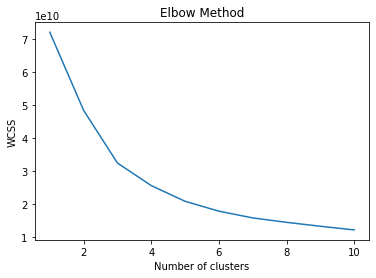

In [34]:
sseEval = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df.drop('Private', axis=1))
    sseEval.append(kmeans.inertia_)
plt.plot(range(1, 11), sseEval)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Can use a **function** to **generate labels** in this case.

In [35]:
def convert(private):
    if private == 'Yes':
        return 1
    else:
        return 0

df['Cluster'] = df['Private'].apply(convert)
df.tail(10)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Winthrop University,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59,0
Wisconsin Lutheran College,Yes,152,128,75,17,41,282,22,9100,3700,500,1400,48,48,8.5,26,8960,50,1
Wittenberg University,Yes,1979,1739,575,42,68,1980,144,15948,4404,400,800,82,95,12.8,29,10414,78,1
Wofford College,Yes,1501,935,273,51,83,1059,34,12680,4150,605,1440,91,92,15.3,42,7875,75,1
Worcester Polytechnic Institute,Yes,2768,2314,682,49,86,2802,86,15884,5370,530,730,92,94,15.2,34,10774,82,1
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,0
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,1
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,1
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,1
York College of Pennsylvania,Yes,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99,1


Use a **confusion matrix** and **classification report** to evaluate classification problem.

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(df['Cluster'], kmeans.labels_))